<a href="https://colab.research.google.com/github/sergionl/TP_complejidad/blob/main/TP_Djisktra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerias**

In [3]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 268 (delta 150), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (268/268), 274.11 KiB | 2.63 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [4]:
from itertools import permutations
from algorithmic_complexity.aclib import graphstuff as gs
import pandas as pd
import numpy as np
import networkx as nx
import math
import heapq as pq

**DataSet**

In [5]:
url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblacionesDF = pd.read_csv(url)

In [6]:
#Imprimir el inicio de la lista de 
print("Número de poblaciones: " + str(len(poblacionesDF)))
poblacionesDF.head()

Número de poblaciones: 3757


,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
0,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.422545,-78.45299,311,1206
1,AMAZONAS,BAGUA,ARAMANGO,RESERVA UJUCANO,-5.427565,-78.444372,44,129
2,AMAZONAS,BAGUA,ARAMANGO,TUTUMBEROS,-5.327317,-78.44472,49,179
3,AMAZONAS,BAGUA,BAGUA,ALENYA BAJO,-5.682439,-78.495229,3,8
4,AMAZONAS,BONGARA,CUISPES,MITOPAMPA,-5.93856,-77.965302,1,4


In [7]:
#Imprimir provincias de un departamento
nomprovincias = poblacionesDF['PROVINCIA'].unique()
print("Número de provincias: " + str(len(nomprovincias)))
nomprovincias

Número de provincias: 157


array(['BAGUA', 'BONGARA', 'CHACHAPOYAS', 'UTCUBAMBA', 'ANTONIO RAYMONDI',
       'BOLOGNESI', 'CARHUAZ', 'CASMA', 'HUARAZ', 'HUARI', 'HUAYLAS',
       'OCROS', 'POMABAMBA', 'RECUAY', 'SANTA', 'SIHUAS', 'YUNGAY',
       'ABANCAY', 'ANDAHUAYLAS', 'ANTABAMBA', 'AYMARAES', 'CHINCHEROS',
       'GRAU', 'AREQUIPA', 'CAMANA', 'CARAVELI', 'CASTILLA', 'CAYLLOMA',
       'CONDESUYOS', 'CANGALLO', 'HUAMANGA', 'HUANCA SANCOS', 'HUANTA',
       'LUCANAS', 'PARINACOCHAS', 'VICTOR FAJARDO', 'CAJABAMBA',
       'CAJAMARCA', 'CELENDIN', 'CHOTA', 'CONTUMAZA', 'CUTERVO', 'JAEN',
       'SAN IGNACIO', 'SAN MARCOS', 'SAN MIGUEL', 'SAN MIMGUEL',
       'SANTA CRUZ', 'ACOMAYO', 'CALCA', 'CANAS', 'CANCHIS',
       'CHUMBIVILCAS', 'LA CONVENCION', 'PARURO', 'QUISPICANCHI',
       'PROVINCIA', 'CASTROVIRREYNA', 'CHURCAMPA', 'HUANCAVELICA',
       'HUAYTARA', 'TAYACAJA', 'AMBO', 'DOS DE MAYO', 'DOSDEMAYO',
       'HUAMALIES', 'HUANUCO SANTA', 'HUANUCO', 'LAURICOCHA',
       'LEONCIO PRADO', 'MARAÑON', 'PUERTO I

In [8]:
#Imprimir número de distritos x provincia
provincias = dict()
for nom in nomprovincias:
  provincias[nom] = poblacionesDF[poblacionesDF['PROVINCIA'] == nom]
  print(nom, len(provincias[nom]))

BAGUA 4
BONGARA 8
CHACHAPOYAS 1
UTCUBAMBA 12
ANTONIO RAYMONDI 2
BOLOGNESI 5
CARHUAZ 20
CASMA 14
HUARAZ 38
HUARI 20
HUAYLAS 5
OCROS 2
POMABAMBA 21
RECUAY 28
SANTA 22
SIHUAS 6
YUNGAY 7
ABANCAY 41
ANDAHUAYLAS 8
ANTABAMBA 2
AYMARAES 23
CHINCHEROS 12
GRAU 1
AREQUIPA 24
CAMANA 16
CARAVELI 16
CASTILLA 1
CAYLLOMA 20
CONDESUYOS 3
CANGALLO 20
HUAMANGA 3
HUANCA SANCOS 38
HUANTA 7
LUCANAS 92
PARINACOCHAS 1
VICTOR FAJARDO 29
CAJABAMBA 10
CAJAMARCA 13
CELENDIN 16
CHOTA 6
CONTUMAZA 16
CUTERVO 6
JAEN 11
SAN IGNACIO 2
SAN MARCOS 2
SAN MIGUEL 13
SAN MIMGUEL 1
SANTA CRUZ 1
ACOMAYO 14
CALCA 3
CANAS 4
CANCHIS 12
CHUMBIVILCAS 3
LA CONVENCION 13
PARURO 14
QUISPICANCHI 22
PROVINCIA 1
CASTROVIRREYNA 49
CHURCAMPA 1
HUANCAVELICA 6
HUAYTARA 32
TAYACAJA 1
AMBO 37
DOS DE MAYO 7
DOSDEMAYO 1
HUAMALIES 6
HUANUCO SANTA 1
HUANUCO 27
LAURICOCHA 11
LEONCIO PRADO 28
MARAÑON 12
PUERTO INCA 9
CHINCHA 1
ICA 60
NASCA 6
PALPA 30
PISCO 14
CHANCHAMAYO 14
CHUPACA 13
CONCEPCION 1
HUANCAYO 13
JAUJA 1
JUNIN 2
SATIPO 6
TARMA 35
ASCOPE

In [9]:
#Seleccionar Provincia + Distrito
no_type_checking = ''
nom_provincia = 'TACNA' #@param {type:"string"}
nom_distrito = 'CALANA' #@param {type:"string"}

In [10]:
#Imprimir distritos x provincia seleccionada
nombreDistritos = provincias[nom_provincia]['DISTRITO'].unique()
print("Número de distritos en " + nom_provincia + ": " + str(len(nombreDistritos)))
nombreDistritos

Número de distritos en TACNA: 3


array(['CALANA', 'PACHIA', 'PALCA'], dtype=object)

In [11]:
#Imprimir número de centros poblados x distrito
distritos = dict()
print("Número de centros poblados por distrito:")
for nom in nombreDistritos:
  distritos[nom] = provincias[nom_provincia][provincias[nom_provincia]['DISTRITO'] == nom]
  print(nom, len(distritos[nom]))

Número de centros poblados por distrito:
CALANA 7
PACHIA 3
PALCA 1


In [12]:
#Imprimir centros poblados de un distrito
distrito = distritos[nom_distrito]
print(distrito)

     DEPARTAMENTO PROVINCIA DISTRITO  ...    LONGITUD NMI1 NMI2
3497        TACNA     TACNA   CALANA  ...  -70.187133  259  747
3498        TACNA     TACNA   CALANA  ...  -70.178213   24   64
3499        TACNA     TACNA   CALANA  ...  -70.195068    3    4
3500        TACNA     TACNA   CALANA  ...  -70.192863    0    0
3501        TACNA     TACNA   CALANA  ...  -70.192825    0    0
3502        TACNA     TACNA   CALANA  ...  -70.187133  259  747
3503        TACNA     TACNA   CALANA  ...  -70.194209   70  252

[7 rows x 8 columns]


In [20]:
#Imprimir lista de centros poblados
print("Lista de centros poblados")
print("------------------------------")

col = 'CENTRO POBLADO'
centrosPoblados = []

G = nx.Graph()

for i, cp1 in distrito.iterrows():
  print(cp1[col])
  centrosPoblados.append(cp1[col])

  #Distancia entre centros poblados
  for j, cp2 in distrito.iterrows():
    if cp1[col] != cp2[col]:
      G.add_edge(cp1[col], cp2[col], weight=dist(cp1, cp2))

Lista de centros poblados
------------------------------
PIEDRA BLANCA-CERRO BLANCO-SANTA RITA-VILLA PACIFICO
ALTO CALANA
EL TRIUNFO
HIJOS DE PIEDRA BLANCA
LOS FRUTALES
PIEDRA BLANCA-CERRO BLANCOSANTA RITA-VILLA PACIFICO
VILLA PACIFICO


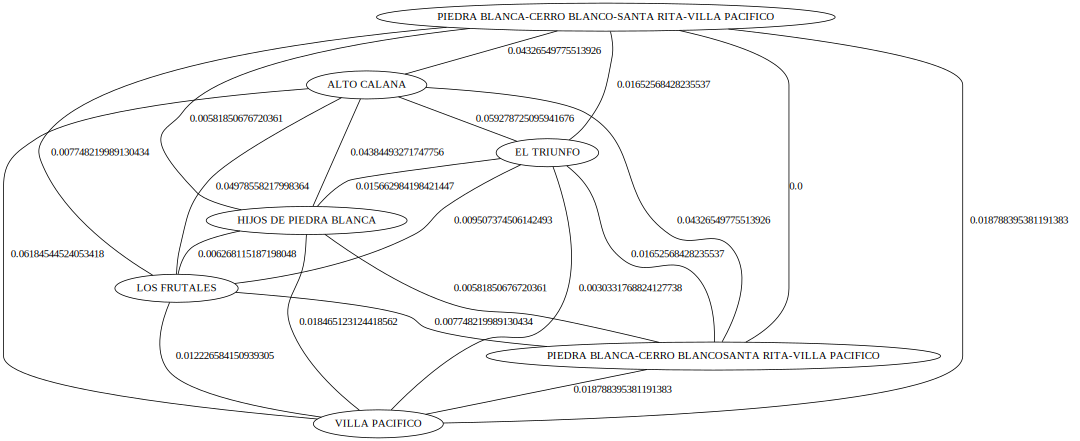

In [18]:
#Imprimir grafo 
gs.nx2gv(G, weighted=True, params={'size':'15'}, nodeinfo=True)

# **Código**

**Distancia Euclidiana**

In [34]:
#Calcular la distancia Euclidiana
def calc_dist(cp1, cp2):
  x1, y1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  x2, y2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])

  return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

**Dijkstra**

In [13]:
def dijkstra(n: int, adj: list, start: int):
    vis = [False for _ in range(n)]
    dist = [float('inf') for _ in range(n)]
    q = []
    dist[start] = 0
    pq.heappush(q, (0, start)) 

    while len(q) > 0:
        _, v = pq.heappop(q)

        if vis[v]:
            continue

        vis[v] = True

        for e, w in adj[v]:
            w
            if dist[v] + w < dist[e] and vis[e] == False:
                dist[e] = dist[v] + w
                pq.heappush(q, (dist[e], e))

    return a.index(min(dist))

**Main Code**

In [33]:
print(centrosPoblados)

camino = []
adj = [[] for _ in range(len(centrosPoblados))]

for _, cp1 in distrito.iterrows():
    adj[a].append((b, calc_dist(float(cp1['LATITUD']))))

#for i in G.nodes
  #c, sol = dijkstra()

['PIEDRA BLANCA-CERRO BLANCO-SANTA RITA-VILLA PACIFICO', 'ALTO CALANA', 'EL TRIUNFO', 'HIJOS DE PIEDRA BLANCA', 'LOS FRUTALES', 'PIEDRA BLANCA-CERRO BLANCOSANTA RITA-VILLA PACIFICO', 'VILLA PACIFICO']
